##### **This file intends to show some basic graphs for future analysis and better understanding of the dataset**
<span style="color: #FFB6C1;">please make sure you have started and selected the correct python interpreter (venv) before running this file <span>
- start your venv env using .\venv\Scripts\activate
- make sure you've installed all requirements.txt
- select correct env in the IDE (top right corner for VSC)
- if "venv" doesn not appear try selecting manually .\venv\Scripts\python.exe
- if it still does not work, try python -m ipykernel install --user --name venv --display-name "Python venv" and try repeating previous step

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime
import chardet

# Mon - Usual traffic
# Tue - Brute Force, FTP-Patator, SSH-Patator
# Wed - DoS/DDoS attacks
# Thu_1 (Morning) - Web attacks (SQL Injection, XSS, etc.)
# Thu_2 (Afternoon) - Infiltration, Meta Exploit
# Fri_1 (Morning) - Botnet
# Fri_2 (Afternoon) - PortScan
# Fri_3 (Afternoon) - DDoS LOIT (LOIC?)
'''
datasets = {
    "Mon": "../data/Monday-WorkingHours.pcap_ISCX.csv",
    "Tue": "../data/Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wed": "../data/Wednesday-workingHours.pcap_ISCX.csv",
    "Thu_1": "../data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thu_2": "../data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Fri_1": "../data/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Fri_2": "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Fri_3": "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
}
'''
datasets = {
    "Mon": "../data/Mon-Expanded.csv",
    "Tue": "../data/Tue-Expanded.csv",
    "Wed": "../data/Wed-Expanded.csv",
    "Thu_1": "../data/Thu_1-Expanded.csv",
    "Thu_2": "../data/Thu_2-Expanded.csv",
    "Fri_1": "../data/Fri_1-Expanded.csv",
    "Fri_2": "../data/Fri_2-Expanded.csv",
    "Fri_3": "../data/Fri_3-Expanded.csv"
}

def load_dataset(day, encoding="latin1"):
    df = pd.read_csv(datasets[day], encoding=encoding)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    return df

def read_timestamp(timestamp_str) -> pd.Timestamp:
    return pd.to_datetime(timestamp_str, errors='coerce')

def convert_to_datetime(df, column='Timestamp'):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


### **0. Dataset specification overview**

In [4]:
df = pd.read_csv(datasets["Tue"])
df.columns = df.columns.str.strip()
df.info()

rows_count = df.shape[0]
clean_df = df.dropna()
print(f"Rows dropped {rows_count - clean_df.shape[0]}")
print(f"Rows after cleaning: {clean_df.shape[0]}")
print(clean_df['Label'].unique())
clean_df.head()

with open(datasets['Tue'], 'rb') as f:
    result = chardet.detect(f.read(100000))
    print(result)

print(clean_df.head())

print(type(df['Timestamp']))
print(df['Timestamp'].dtype)
print(dir(df['Timestamp']))
print(df['Timestamp'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445708 entries, 0 to 445707
Data columns (total 90 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      445708 non-null  object 
 1   Source IP                    445708 non-null  object 
 2   Source Port                  445708 non-null  int64  
 3   Destination IP               445708 non-null  object 
 4   Destination Port             445708 non-null  int64  
 5   Protocol                     445708 non-null  int64  
 6   Timestamp                    445708 non-null  object 
 7   Flow Duration                445708 non-null  int64  
 8   Total Fwd Packets            445708 non-null  int64  
 9   Total Backward Packets       445708 non-null  int64  
 10  Total Length of Fwd Packets  445708 non-null  int64  
 11  Total Length of Bwd Packets  445708 non-null  float64
 12  Fwd Packet Length Max        445708 non-null  int64  
 13 

### **1. Dataset Overview**

#### 1.1


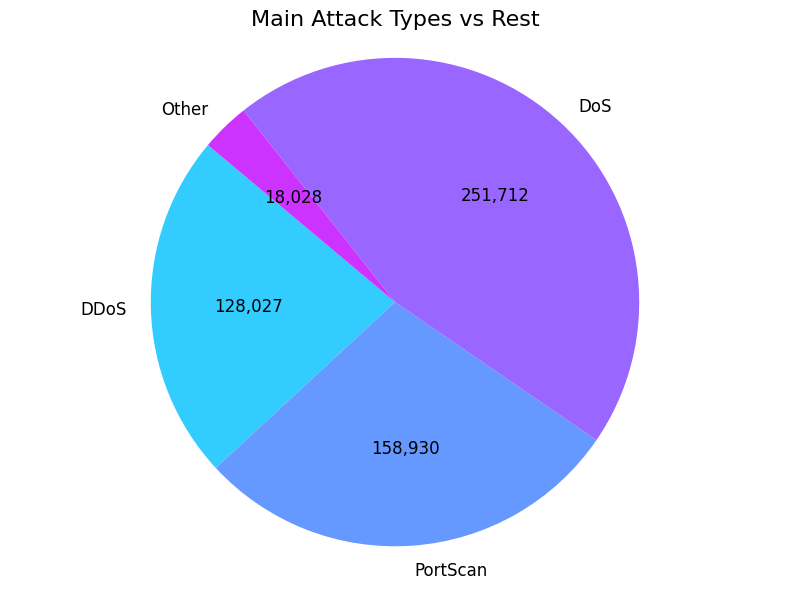

C:\Users\PanHe\AppData\Local\Temp\ipykernel_29220\550956780.py:83: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
x:\IDS-project\IDS-Analyzer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


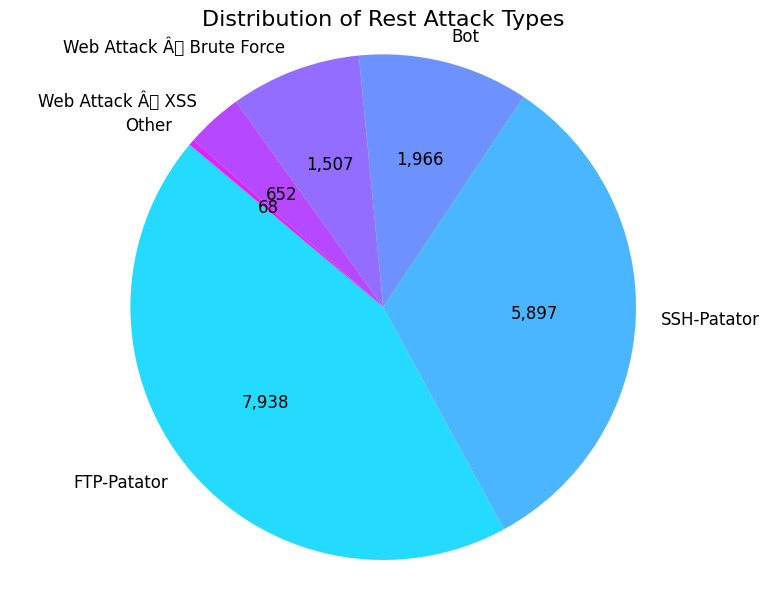

C:\Users\PanHe\AppData\Local\Temp\ipykernel_29220\550956780.py:97: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()


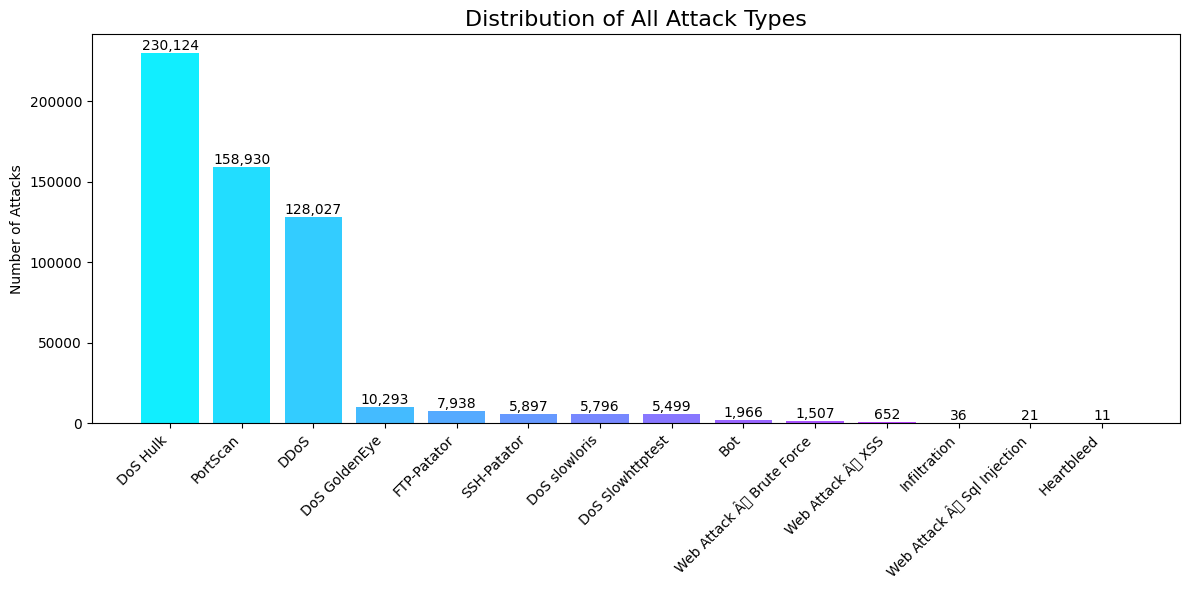

In [5]:
from collections import defaultdict

attack_counts = defaultdict(int)
dos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest']
main_attacks = ['DDoS', 'PortScan', 'DoS']

for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df.columns = day_df.columns.str.strip()
    clean_day_df = day_df.dropna()
    labels = clean_day_df['Label'].unique()
    for label in labels:
        if label != 'BENIGN':
            count = clean_day_df[clean_day_df['Label'] == label].shape[0]
            attack_counts[label] += count

sorted_attack_counts = dict()
for k in sorted(attack_counts, key=attack_counts.get, reverse=True):
    sorted_attack_counts[k] = attack_counts[k]

dos_total = 0
for dos_label in dos_attacks:
    dos_total += sorted_attack_counts.get(dos_label, 0)

main_counts = {
    'DDoS': sorted_attack_counts.get('DDoS', 0),
    'PortScan': sorted_attack_counts.get('PortScan', 0),
    'DoS': dos_total
}

rest_counts = {}
for k, v in sorted_attack_counts.items():
    if k not in main_attacks and k not in dos_attacks:
        rest_counts[k] = v
main_counts['Other'] = sum(rest_counts.values())

# Chart 1: Main attacks
plt.figure(figsize=(8, 6))
colors_main = sns.color_palette('cool', len(main_counts))
patches1, texts1, autotexts1 = plt.pie(
    list(main_counts.values()),
    labels=list(main_counts.keys()),
    autopct=lambda pct: f"{int(pct/100.*sum(main_counts.values())):,}",
    startangle=140,
    colors=colors_main,
    textprops={'fontsize': 12}
)
plt.title('Main Attack Types vs Rest', fontsize=16)
plt.axis('equal')
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 2: Less prominent attacks
grouped_rest = {}
other_total = 0
for k, v in rest_counts.items():
    if v < 100:
        other_total += v
    else:
        grouped_rest[k] = v
if other_total > 0:
    grouped_rest['Other'] = other_total

plt.figure(figsize=(8, 6))
colors_rest = sns.color_palette('cool', len(grouped_rest))
patches2, texts2, autotexts2 = plt.pie(
    grouped_rest.values(),
    labels=grouped_rest.keys(),
    autopct=lambda pct: f"{int(pct/100.*sum(grouped_rest.values())):,}",
    startangle=140,
    colors=colors_rest,
    textprops={'fontsize': 12}
)
plt.title('Distribution of Rest Attack Types', fontsize=16)
plt.axis('equal')
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 3: all attacks
plt.figure(figsize=(12, 6))
colors_all = sns.color_palette('cool', len(sorted_attack_counts))
bars = plt.bar(sorted_attack_counts.keys(), sorted_attack_counts.values(), color=colors_all)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Attacks')
plt.title('Distribution of All Attack Types', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



#### 1.2

C:\Users\PanHe\AppData\Local\Temp\ipykernel_29220\2682345308.py:68: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
x:\IDS-project\IDS-Analyzer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


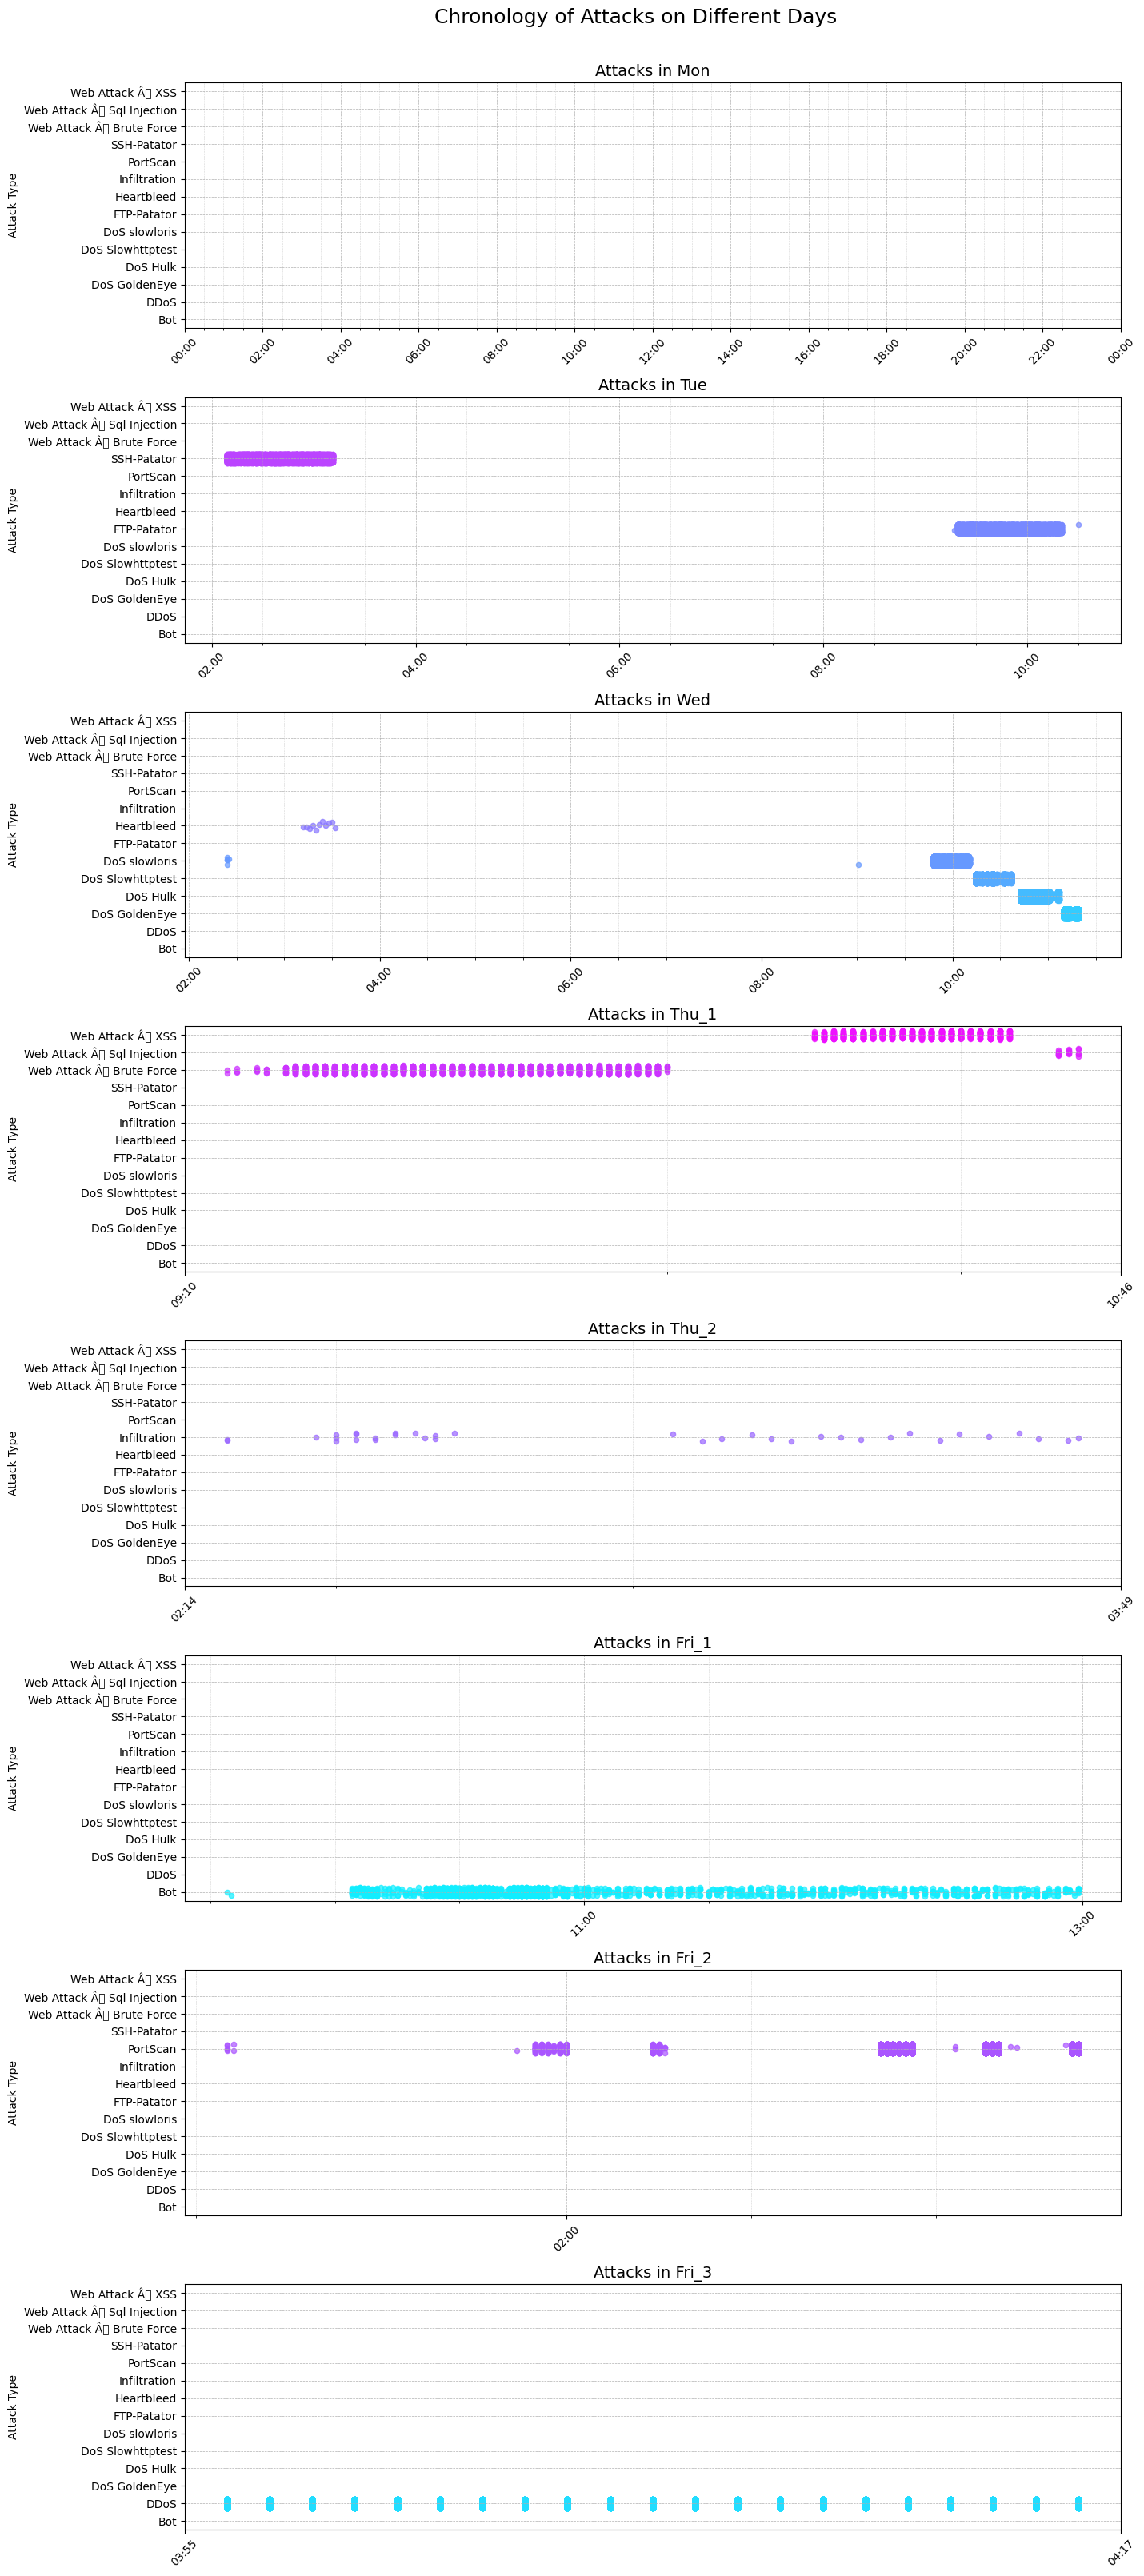

In [6]:
all_labels = set()
for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df = day_df.dropna(subset=['Label'])
    non_benign = day_df[day_df['Label'] != 'BENIGN']
    unique_labels = non_benign['Label'].unique()
    for label in unique_labels:
        all_labels.add(label)

sorted_labels = sorted(list(all_labels))
label_to_y = {}
for i, label in enumerate(sorted_labels):
    label_to_y[label] = i

colors = sns.color_palette('cool', len(sorted_labels))
label_to_color = {}
for label, color in zip(sorted_labels, colors):
    label_to_color[label] = color

fig, axes = plt.subplots(
    nrows=len(datasets),
    ncols=1,
    figsize=(16, 4 * len(datasets)),
    sharex=False,
    sharey=True
)
if len(datasets) == 1:
    axes = [axes]

for i, (day, path) in enumerate(datasets.items()):
    ax = axes[i]
    day_df = load_dataset(day)
    day_df = convert_to_datetime(day_df)
    day_df = day_df.dropna(subset=['Timestamp', 'Label'])
    day_df = day_df[day_df['Label'] != 'BENIGN']

    labels_in_day = day_df['Label'].unique()
    for label in labels_in_day:
        if label in label_to_y:
            subset = day_df[day_df['Label'] == label]
            y_base = label_to_y[label]
            y_jitter = y_base + np.random.uniform(-0.25, 0.25, size=len(subset))

            ax.scatter(
                subset['Timestamp'],
                y_jitter,
                color=label_to_color[label],
                s=20,
                alpha=0.7,
                label=label
            )

    ax.set_yticks(list(range(len(sorted_labels))))
    ax.set_yticklabels(sorted_labels)
    ax.set_ylim(-0.5, len(sorted_labels) - 0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))
    ax.tick_params(axis='x', rotation=45)

    ax.set_title(f'Attacks in {day}', fontsize=14)
    ax.set_ylabel('Attack Type')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.4)

fig.suptitle('Chronology of Attacks on Different Days', fontsize=18, y=1.005)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


### **2 DoS/DDoS attacks**

C:\Users\PanHe\AppData\Local\Temp\ipykernel_1924\2294186302.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


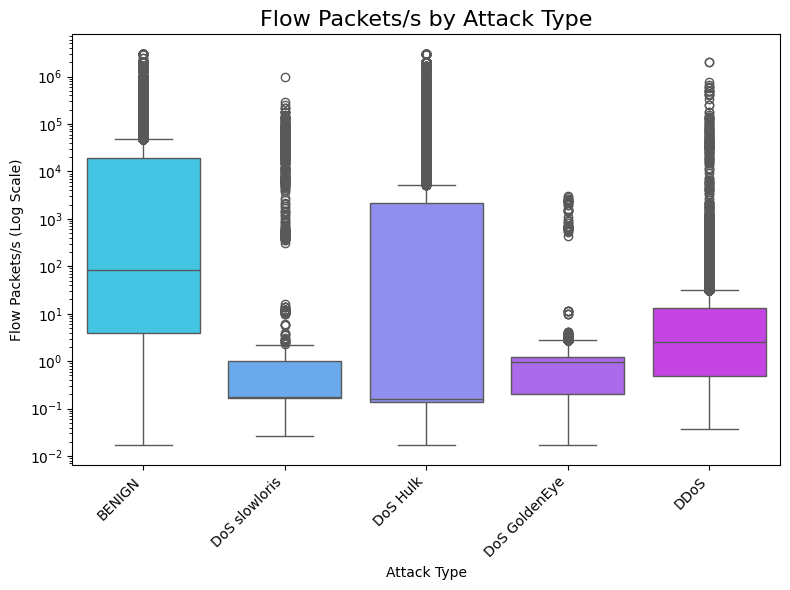

C:\Users\PanHe\AppData\Local\Temp\ipykernel_1924\2294186302.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


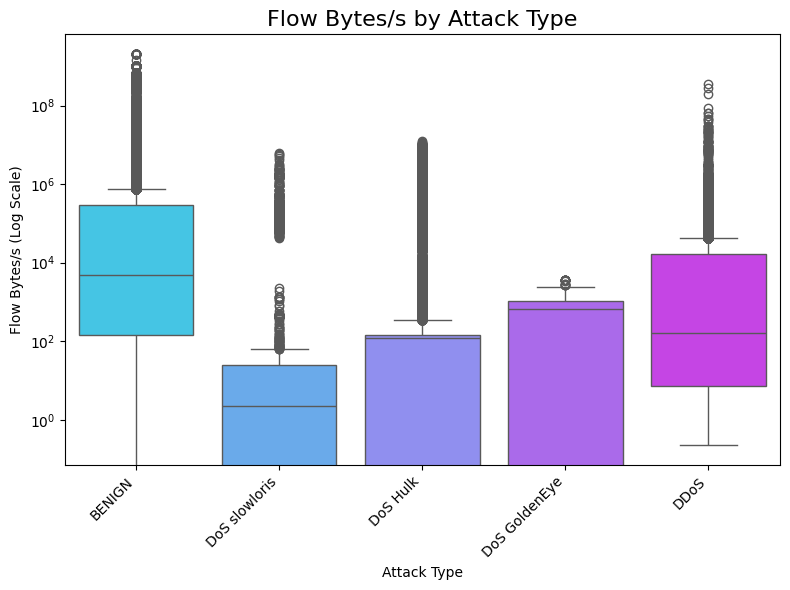

C:\Users\PanHe\AppData\Local\Temp\ipykernel_1924\2294186302.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


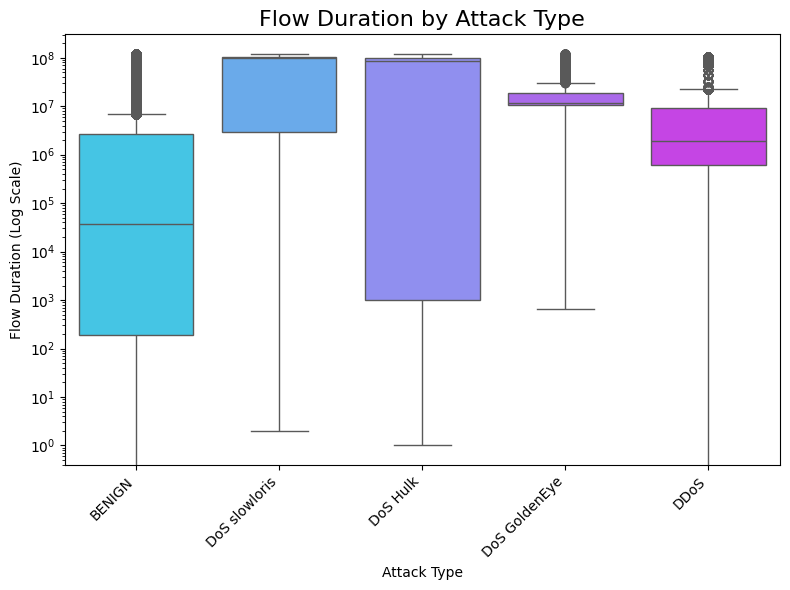

In [ ]:
dos_ddos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DDoS']

df_wed = load_dataset('Wed')
df_wed.columns = df_wed.columns.str.strip()
df_wed = df_wed.dropna()

df_fri3 = load_dataset('Fri_3')
df_fri3.columns = df_fri3.columns.str.strip()
df_fri3 = df_fri3.dropna()

dos_labels = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'BENIGN']
df_dos = df_wed[df_wed['Label'].isin(dos_labels)].copy()

ddos_labels = ['DDoS', 'BENIGN']
df_ddos = df_fri3[df_fri3['Label'].isin(ddos_labels)].copy()

dos_ddos_df = pd.concat([df_dos, df_ddos], ignore_index=True)

# Flow Packets/s Plot
plt.figure(figsize=(8, 6))
colors_pkt = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Packets/s',
    data=dos_ddos_df,
    palette=colors_pkt
)
plt.title('Flow Packets/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Packets/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Flow Bytes/s Plot
plt.figure(figsize=(8, 6))
colors_bytes = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Bytes/s',
    data=dos_ddos_df,
    palette=colors_bytes
)
plt.title('Flow Bytes/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Bytes/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Flow Duration Plot
plt.figure(figsize=(8, 6))
colors_dur = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Duration',
    data=dos_ddos_df,
    palette=colors_dur
)
plt.title('Flow Duration by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.1 DoS Slowloris

#### 2.2 DoS SlowHttptest

#### 2.3 DoS Hulk

#### 2.4 DoS GoldenEye

#### 2.5 DDoS